In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

In [2]:
# Load data
df = pd.read_csv('bodyfat.csv')
df.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Pre Processing

In [3]:
#Checking for the size and shape of the dataset
print("Size : ", df.size)
print("Shape : ", df.shape)

Size :  3780
Shape :  (252, 15)


In [5]:
#Overall statistical description of the relevant data
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [6]:
#Checking for noise
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

### Dataset has null values

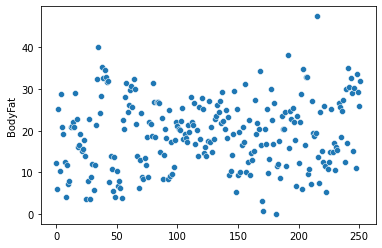

In [7]:
#Visualising the distribution of target variable
sns.scatterplot(df.BodyFat)
plt.show()

## Train test split

In [8]:
# Select features and target
X = df.drop(['BodyFat'], axis=1)
y = df['BodyFat']

In [9]:
# Split data: 80% train, 10% validation, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)

In [10]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

## Model Building

In [11]:
# Build the neural network
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

## Compiling model

In [12]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

## Model Training

In [13]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32
)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1963.2294 - mae: 30.2569 - val_loss: 457.9450 - val_mae: 19.1170
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 418.0925 - mae: 18.6735 - val_loss: 401.2954 - val_mae: 17.5730
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 335.6693 - mae: 16.4350 - val_loss: 305.2723 - val_mae: 14.7408
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 249.6177 - mae: 13.3419 - val_loss: 227.1638 - val_mae: 13.0437
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 157.0390 - mae: 10.2813 - val_loss: 115.2067 - val_mae: 9.0649
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 81.7474 - mae: 7.2644 - val_loss: 92.7818 - val_mae: 7.8654
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 74.6090 - mae: 7.1894 - val_loss: 102.2087 - val_mae: 8.0286
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 76.4655 - mae: 7.2380 - val_loss: 96.8449 - val_mae: 7.8908
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

## Model Evaluation

In [14]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 37.5081 - mae: 4.9269
Test MSE: 37.5081, Test MAE: 4.9269


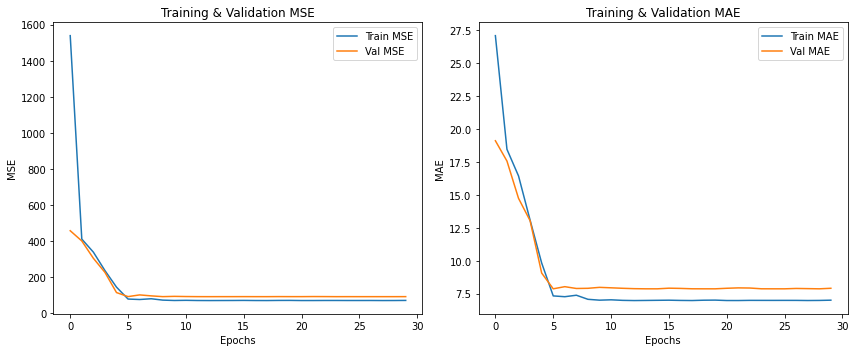

In [15]:
# Plot training & validation loss/MAE
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training & Validation MSE')

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training & Validation MAE')
plt.tight_layout()
plt.show()

### The optimal hyperparameter, that is the number of epochs, is 5 as per the Loss Curves for the model.